# Comparison on all splits (with diagonal seeds) 

In [ ]:
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import average_precision_score, roc_auc_score

In [ ]:
main_path = "set_your_path"
sparse_path = main_path / "sparse_2025-10-29/2025-10-29_10-52-27"
base_path = main_path / "base_2025-10-25_11-45-24"
frange = main_path / "frange_2025-10-24_17-12-20"
cycle = main_path / "cycle_beta"


In [ ]:
def agg_function_mse(series):
    mean = format(series.mean() * 1000, ".2f")
    std = format(series.std() * 1000, ".2f")
    return "${} \pm {}$".format(mean, std)


def agg_function_rmse(series):
    mean = format(series.mean(), ".1f")
    std = format(series.std(), ".1f")
    return "${} \pm {}$".format(mean, std)


def agg_function_ssim(series):
    mean = format(series.mean() * 100, ".2f")
    std = format(series.std() * 100, ".2f")
    return "${} \pm {}$".format(mean, std)


def agg_function_ap(series):
    mean = format(series.mean() * 100, ".0f")
    std = format(series.std() * 100, ".0f")
    return "${} \pm {}$".format(mean, std)


def agg_function_acc(series):
    mean = format(series.mean() * 100, ".1f")
    std = format(series.std() * 100, ".1f")
    return "${} \pm {}$".format(mean, std)


## Results on validation set

,vae_variant,MSE,SSIM
0,beta_1,$1.14 \pm 0.19$,$94.29 \pm 0.84$
1,beta_10,$1.18 \pm 0.20$,$94.20 \pm 0.85$
2,beta_30,$1.24 \pm 0.21$,$94.11 \pm 0.86$
3,beta_50,$1.26 \pm 0.21$,$94.07 \pm 0.87$
4,cycle_beta_30,$1.20 \pm 0.20$,$94.15 \pm 0.86$
5,cycle_beta_50,$1.22 \pm 0.20$,$94.22 \pm 0.85$
6,frange_beta_30,$1.24 \pm 0.21$,$94.18 \pm 0.85$
7,frange_beta_50,$1.26 \pm 0.21$,$94.12 \pm 0.87$
8,sparse,$1.20 \pm 0.20$,$94.21 \pm 0.83$


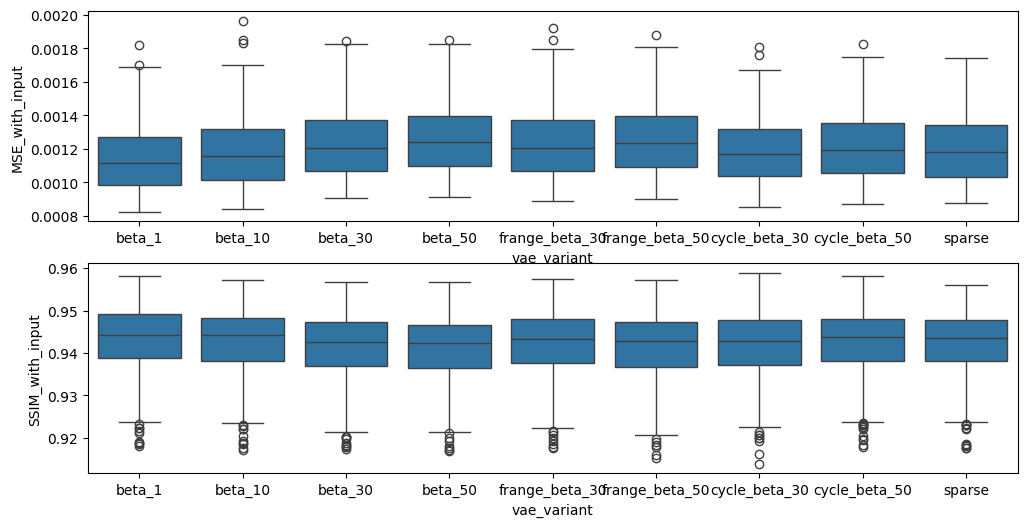

In [ ]:
dfs = []

# Base:
for i in range(5):
    for beta in [1, 10, 30, 50]:
        df = pd.read_csv(
            Path(
                base_path,
                f"beta_{beta}",
                f"split_{str(i)}",
                "test_cn_baseline",
                "metrics_on_test.csv",
            )
        )
        df["split"] = i
        df["vae_variant"] = f"beta_{beta}"
        dfs.append(df)

# Frange
for i in range(5):
    for beta in [30, 50]:
        df = pd.read_csv(
            Path(
                frange,
                f"beta_{beta}",
                f"split_{str(i)}",
                "test_cn_baseline",
                "metrics_on_test.csv",
            )
        )
        df["split"] = i
        df["vae_variant"] = f"frange_beta_{beta}"
        dfs.append(df)
# Frange
for i in range(5):
    for beta in [30, 50]:
        df = pd.read_csv(
            Path(
                cycle,
                f"beta_{beta}",
                f"split_{str(i)}/seed_0",
                "test_cn_baseline",
                "metrics_on_test.csv",
            )
        )
        df["split"] = i
        df["vae_variant"] = f"cycle_beta_{beta}"
        dfs.append(df)

# Sparse
for i in range(5):
    for lalpha in [-3.0]:
        df = pd.read_csv(
            Path(
                sparse_path,
                "beta_1.0",
                f"lalpha_{lalpha}/split_{str(i)}/seed_0",
                "test_cn_baseline",
                "metrics_on_test.csv",
            )
        )
        df["split"] = i
        df["vae_variant"] = "sparse"
        dfs.append(df)

df_he = pd.concat(dfs)

# Plot the MSE
metrics = ["MSE_with_input", "SSIM_with_input"]
fig, ax = plt.subplots(len(metrics), 1, figsize=(12, 6))
for i, metric in enumerate(metrics):
    sns.boxplot(df_he, x="vae_variant", y=metric, ax=ax[i])

table_healthy = df_he.groupby(["vae_variant"]).agg(
    {"MSE_with_input": agg_function_mse, "SSIM_with_input": agg_function_ssim}
)

table_healthy = table_healthy.reset_index()
table_healthy = table_healthy.rename(
    columns={"MSE_with_input": "MSE", "SSIM_with_input": "SSIM"}
)

table_healthy

## Results on simulated datasets

,vae_variant,MSE30,rMSE,AP 30,BD30
0,beta_1,$1.66 \pm 0.34$,$1.5 \pm 0.3$,$48 \pm 8$,$49 \pm 5$
1,beta_10,$1.67 \pm 0.34$,$1.4 \pm 0.3$,$51 \pm 8$,$51 \pm 6$
2,beta_30,$1.70 \pm 0.33$,$1.4 \pm 0.3$,$53 \pm 7$,$52 \pm 5$
3,beta_50,$1.72 \pm 0.34$,$1.4 \pm 0.2$,$56 \pm 7$,$54 \pm 5$
4,cycle_beta_30,$1.61 \pm 0.33$,$1.4 \pm 0.3$,$56 \pm 7$,$54 \pm 5$
5,cycle_beta_50,$1.64 \pm 0.33$,$1.4 \pm 0.3$,$56 \pm 7$,$54 \pm 5$
6,frange_beta_30,$1.68 \pm 0.37$,$1.4 \pm 0.3$,$55 \pm 8$,$54 \pm 5$
7,frange_beta_50,$1.73 \pm 0.35$,$1.4 \pm 0.3$,$55 \pm 8$,$54 \pm 5$
8,sparse,$1.57 \pm 0.30$,$1.3 \pm 0.2$,$56 \pm 7$,$55 \pm 4$


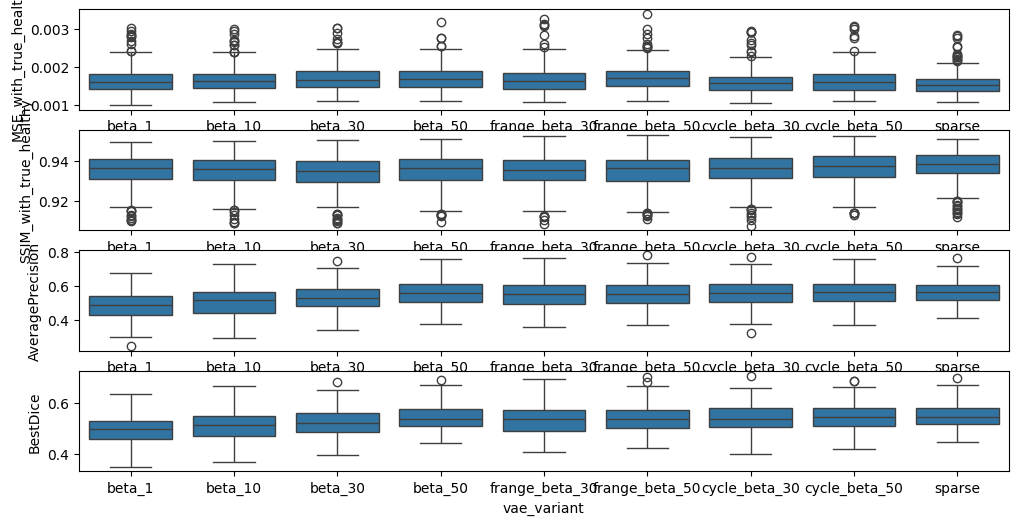

In [ ]:
dfs = []

dataset = "test_AD_30"

# Base:
for i in range(5):
    for beta in [1, 10, 30, 50]:
        df = pd.read_csv(
            Path(
                base_path,
                f"beta_{beta}",
                f"split_{str(i)}",
                dataset,
                "metrics_on_test.csv",
            )
        )
        df["split"] = i
        df["vae_variant"] = f"beta_{beta}"
        dfs.append(df)

# Frange
for i in range(5):
    for beta in [30, 50]:
        df = pd.read_csv(
            Path(
                frange,
                f"beta_{beta}",
                f"split_{str(i)}",
                dataset,
                "metrics_on_test.csv",
            )
        )
        df["split"] = i
        df["vae_variant"] = f"frange_beta_{beta}"
        dfs.append(df)

# Cycle
for i in range(5):
    for beta in [30, 50]:
        df = pd.read_csv(
            Path(
                cycle,
                f"beta_{beta}",
                f"split_{str(i)}/seed_0",
                dataset,
                "metrics_on_test.csv",
            )
        )
        df["split"] = i
        df["vae_variant"] = f"cycle_beta_{beta}"
        dfs.append(df)

# Sparse
for i in range(5):
    for lalpha in [-3.0]:
        df = pd.read_csv(
            Path(
                sparse_path,
                "beta_1.0",
                f"lalpha_{lalpha}/split_{str(i)}/seed_0",
                dataset,
                "metrics_on_test.csv",
            )
        )
        df["split"] = i
        df["vae_variant"] = "sparse"
        dfs.append(df)

df_hy = pd.concat(dfs)
assert np.all(df_hy["participant_id"] == df_he["participant_id"])
assert np.all(df_hy["session_id"] == df_he["session_id"])

df_hy["rMSE"] = df_hy["MSE_with_true_healthy"] / df_he["MSE_with_input"]

# Plot the MSE
metrics = [
    "MSE_with_true_healthy",
    "SSIM_with_true_healthy",
    "AveragePrecision",
    "BestDice",
]
fig, ax = plt.subplots(len(metrics), 1, figsize=(12, 6))
for i, metric in enumerate(metrics):
    sns.boxplot(df_hy, x="vae_variant", y=metric, ax=ax[i])

table_ad_30 = (
    df_hy.groupby(["vae_variant"])
    .agg(
        {
            "MSE_with_true_healthy": agg_function_mse,
            # 'SSIM_with_true_healthy':agg_function_ssim,
            "rMSE": agg_function_rmse,
            "AveragePrecision": agg_function_ap,
            "BestDice": agg_function_ap,
        }
    )
    .reset_index()
)

table_ad_30 = table_ad_30.rename(
    columns={
        "MSE_with_true_healthy": "MSE30",
        "SSIM_with_true_healthy": "SSIM_30",
        "AveragePrecision": "AP 30",
        "BestDice": "BD30",
    }
)

table_ad_30


,vae_variant,MSE50,rMSE,AP 50,BD50
0,beta_1,$2.00 \pm 0.43$,$1.8 \pm 0.4$,$79 \pm 5$,$72 \pm 4$
1,beta_10,$1.97 \pm 0.43$,$1.7 \pm 0.4$,$81 \pm 5$,$73 \pm 4$
2,beta_30,$2.04 \pm 0.47$,$1.7 \pm 0.4$,$80 \pm 5$,$73 \pm 5$
3,beta_50,$2.01 \pm 0.43$,$1.6 \pm 0.3$,$82 \pm 4$,$74 \pm 4$
4,cycle_beta_30,$1.89 \pm 0.40$,$1.6 \pm 0.3$,$83 \pm 4$,$75 \pm 4$
5,cycle_beta_50,$1.90 \pm 0.37$,$1.6 \pm 0.3$,$83 \pm 4$,$75 \pm 4$
6,frange_beta_30,$1.96 \pm 0.47$,$1.6 \pm 0.4$,$83 \pm 5$,$75 \pm 5$
7,frange_beta_50,$2.00 \pm 0.41$,$1.6 \pm 0.3$,$82 \pm 4$,$75 \pm 4$
8,sparse,$1.72 \pm 0.32$,$1.5 \pm 0.3$,$85 \pm 3$,$77 \pm 3$


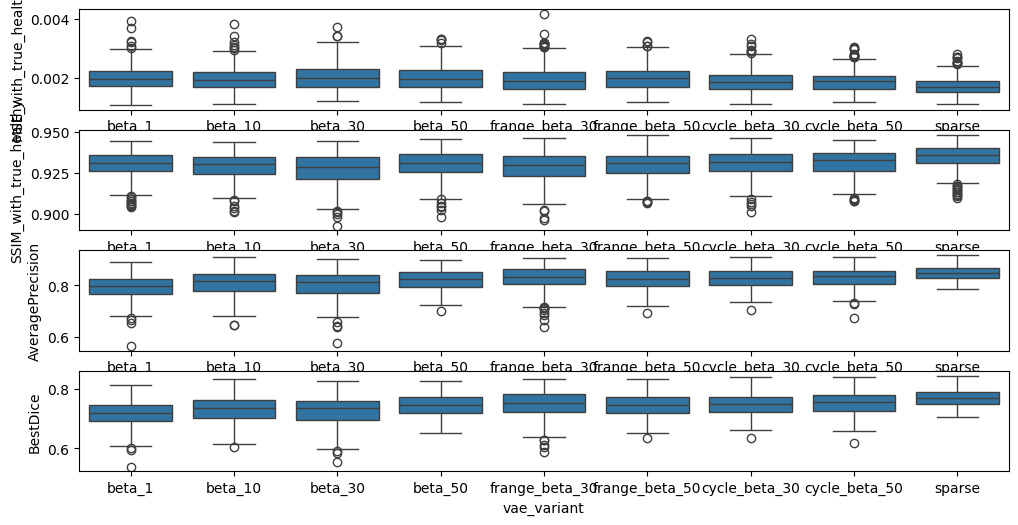

In [ ]:
dfs = []

dataset = "test_AD_50"

# Base:
for i in range(5):
    for beta in [1, 10, 30, 50]:
        df = pd.read_csv(
            Path(
                base_path,
                f"beta_{beta}",
                f"split_{str(i)}",
                dataset,
                "metrics_on_test.csv",
            )
        )
        df["split"] = i
        df["vae_variant"] = f"beta_{beta}"
        dfs.append(df)

# Frange
for i in range(5):
    for beta in [30, 50]:
        df = pd.read_csv(
            Path(
                frange,
                f"beta_{beta}",
                f"split_{str(i)}",
                dataset,
                "metrics_on_test.csv",
            )
        )
        df["split"] = i
        df["vae_variant"] = f"frange_beta_{beta}"
        dfs.append(df)

# Cycle
for i in range(5):
    for beta in [30, 50]:
        df = pd.read_csv(
            Path(
                cycle,
                f"beta_{beta}",
                f"split_{str(i)}/seed_0",
                dataset,
                "metrics_on_test.csv",
            )
        )
        df["split"] = i
        df["vae_variant"] = f"cycle_beta_{beta}"
        dfs.append(df)

# Sparse
for i in range(5):
    for lalpha in [-3.0]:
        df = pd.read_csv(
            Path(
                sparse_path,
                "beta_1.0",
                f"lalpha_{lalpha}/split_{str(i)}/seed_0",
                dataset,
                "metrics_on_test.csv",
            )
        )
        df["split"] = i
        df["vae_variant"] = "sparse"
        dfs.append(df)

df_hy = pd.concat(dfs)
df_hy = pd.concat(dfs)
assert np.all(df_hy["participant_id"] == df_he["participant_id"])
assert np.all(df_hy["session_id"] == df_he["session_id"])

df_hy["rMSE"] = df_hy["MSE_with_true_healthy"] / df_he["MSE_with_input"]

# Plot the MSE
metrics = [
    "MSE_with_true_healthy",
    "SSIM_with_true_healthy",
    "AveragePrecision",
    "BestDice",
]
fig, ax = plt.subplots(len(metrics), 1, figsize=(12, 6))
for i, metric in enumerate(metrics):
    sns.boxplot(df_hy, x="vae_variant", y=metric, ax=ax[i])

table_ad_50 = (
    df_hy.groupby(["vae_variant"])
    .agg(
        {
            "MSE_with_true_healthy": agg_function_mse,
            # 'SSIM_with_true_healthy':agg_function_ssim,
            "rMSE": agg_function_rmse,
            "AveragePrecision": agg_function_ap,
            "BestDice": agg_function_ap,
        }
    )
    .reset_index()
)

table_ad_50 = table_ad_50.rename(
    columns={
        "MSE_with_true_healthy": "MSE50",
        "SSIM_with_true_healthy": "SSIM50",
        "AveragePrecision": "AP 50",
        "BestDice": "BD50",
    }
)

table_ad_50

In [ ]:
dfs = []


for test_set in ["test_cn_baseline", "test_ad_baseline"]:
    # Base:
    for i in range(5):
        for beta in [1, 10, 30, 50]:
            df = pd.read_csv(
                Path(
                    base_path,
                    f"beta_{beta}",
                    f"split_{str(i)}",
                    test_set,
                    "metrics_on_test.csv",
                )
            )
            df["split"] = i
            df["vae_variant"] = f"beta_{beta}"
            df["dataset"] = test_set
            dfs.append(df)

    # Frange
    for i in range(5):
        for beta in [30, 50]:
            df = pd.read_csv(
                Path(
                    frange,
                    f"beta_{beta}",
                    f"split_{str(i)}",
                    test_set,
                    "metrics_on_test.csv",
                )
            )
            df["split"] = i
            df["vae_variant"] = f"frange_beta_{beta}"
            df["dataset"] = test_set
            dfs.append(df)

    # Sparse
    for i in range(5):
        for lalpha in [-3.0]:
            df = pd.read_csv(
                Path(
                    sparse_path,
                    "beta_1.0",
                    f"lalpha_{lalpha}/split_{str(i)}/seed_0",
                    test_set,
                    "metrics_on_test.csv",
                )
            )
            df["split"] = i
            df["vae_variant"] = "sparse"
            df["dataset"] = test_set
            dfs.append(df)

df_test = pd.concat(dfs)

df_test["ap"] = df_test["anomaly_score"] * (
    2 * (df_test["dataset"] == "test_ad_baseline") - 1
)
df_test["auc"] = df_test["anomaly_score"] * (
    2 * (df_test["dataset"] == "test_ad_baseline") - 1
)
df_test["acc"] = df_test["pred_label"] == (df_test["dataset"] == "test_ad_baseline") * 1


def agg_ap(series):
    labels = series > 0
    return average_precision_score(labels, np.abs(series))


def agg_auc(series):
    labels = series > 0
    return roc_auc_score(labels, np.abs(series))


df_test = df_test.groupby(["vae_variant", "split"]).agg(
    {"ap": agg_ap, "auc": agg_auc, "acc": "mean", "healthiness": "mean"}
)


table_true_ad = (
    df_test.groupby(["vae_variant"])
    .agg({"ap": agg_function_acc, "auc": agg_function_acc, "acc": agg_function_acc})
    .reset_index()
)

table_true_ad

,vae_variant,ap,auc,acc
0,beta_1,$82.1 \pm 1.6$,$80.8 \pm 1.3$,$66.6 \pm 6.3$
1,beta_10,$82.3 \pm 1.1$,$80.6 \pm 0.5$,$68.8 \pm 6.3$
2,beta_30,$83.1 \pm 1.1$,$81.0 \pm 0.6$,$69.8 \pm 6.9$
3,beta_50,$83.6 \pm 0.2$,$81.0 \pm 0.7$,$69.2 \pm 5.4$
4,frange_beta_30,$83.1 \pm 1.4$,$80.7 \pm 1.1$,$68.0 \pm 6.8$
5,frange_beta_50,$83.1 \pm 1.0$,$80.7 \pm 0.9$,$70.0 \pm 5.9$
6,sparse,$83.2 \pm 1.4$,$80.6 \pm 1.3$,$68.4 \pm 5.0$


In [ ]:
all_results = pd.merge(table_healthy, table_ad_30, on="vae_variant")
all_results = pd.merge(all_results, table_ad_50, on="vae_variant")
# all_results = pd.merge(all_results,table_true_ad, on='vae_variant')

all_results.to_latex("all_results.txt", index=False)